<a href="https://colab.research.google.com/github/HumayDS/Big-data-analysis/blob/main/6_lesson_Visualization_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/tips2.csv")
print(df.head())
print(df.info())
print(df.describe().T)
print(df.isnull().sum())


   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59   NaN  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         241 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None
            count     

In [3]:
df.drop("Unnamed: 0" , axis = 1, inplace = True)

In [4]:
  df['sex'] = df['sex'].astype('category')
  df['smoker'] = df['smoker'].astype('category')
  df['day'] = df['day'].astype('category')
  df['time'] = df['time'].astype('category')
  df['size'] = df['size'].astype('category')
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         241 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.9 KB


In [5]:
df = df.fillna(df.mean())
df.isnull().sum()

<ipython-input-5-b6ac94816be0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip
total_bill,1.000000,0.247505
tip,0.247505,1.000000


In [7]:

# Detecting and deleting outlier
Q1 = np.percentile(df['tip'], 25, method='midpoint')
Q3 = np.percentile(df['tip'], 75, method='midpoint')
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
print("1ci quatile : ", Q1)
print("2ci quatile : ,", Q3)
print("ashagi serhed : ", lower)
print("yuxari serhed : ", upper)
df_clear = df[df.tip < upper]
print(df_clear.head())
print(df_clear.describe().T)


1ci quatile :  2.0
2ci quatile : , 3.6950000000000003
ashagi serhed :  -0.5425000000000004
yuxari serhed :  6.237500000000001
   total_bill       tip     sex smoker  day    time size
0       16.99  1.010000  Female     No  Sun  Dinner    2
1       10.34  1.660000    Male     No  Sun  Dinner    3
2       21.01  3.500000    Male     No  Sun  Dinner    3
3       23.68  3.310000    Male     No  Sun  Dinner    2
4       24.59  3.490415  Female     No  Sun  Dinner    4
            count       mean       std   min      25%     50%      75%    max
total_bill  234.0  19.174573  8.195749  3.07  13.1875  17.465  23.5925  48.17
tip         234.0   2.866031  1.139289  1.00   2.0000   2.750   3.5000   6.00


In [8]:
df_clear.corr()

<ipython-input-8-af5588ad14a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clear.corr()


,total_bill,tip
total_bill,1.000000,0.602587
tip,0.602587,1.000000


### Barplot

<ipython-input-9-e2d6d1b295e0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x = "sex" , y = "tip" ,  data = df_clear , palette = 'pastel' , ci = None ,


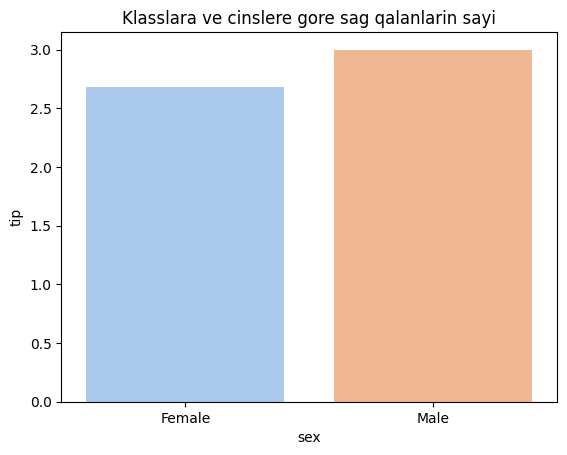

In [9]:
from numpy import mean
from numpy import median
barplot = sns.barplot(x = "sex" , y = "tip" ,  data = df_clear , palette = 'pastel' , ci = None ,
              estimator = median ).set(title = "Klasslara ve cinslere gore sag qalanlarin sayi")

plt.show()


### Boxplot

Text(0.5, 1.0, 'boxplot')

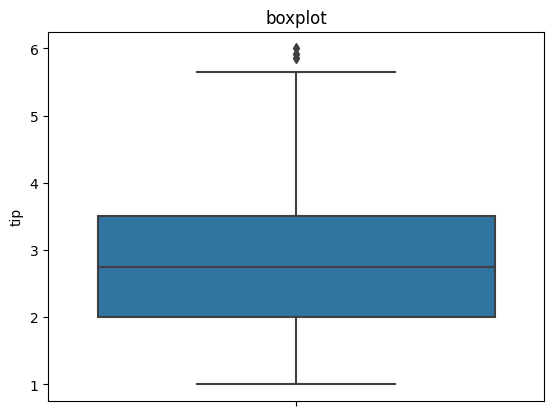

In [10]:
sns.boxplot(y='tip',data=df_clear).set_title("boxplot")

<Axes: xlabel='sex', ylabel='count'>

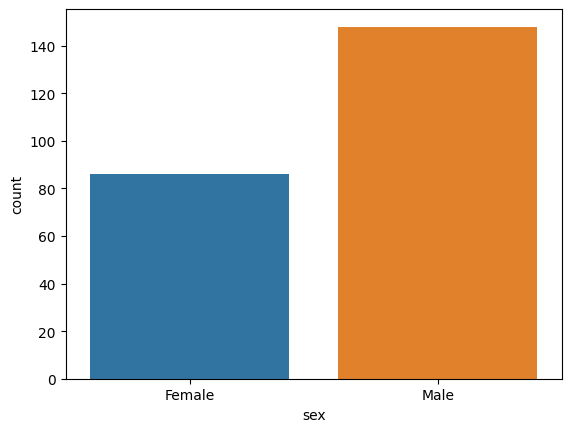

In [11]:
sns.countplot(x='sex', data=df_clear )

<ipython-input-12-c7bab69a9101>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = df_clear.corr()


Text(0.5, 1.0, 'titanic.corr()')

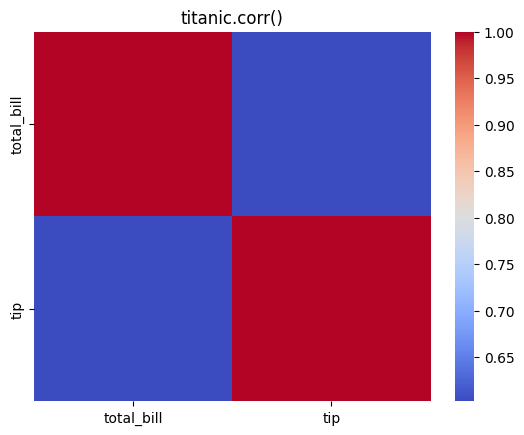

In [12]:
tc = df_clear.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

In [13]:
df_clear.corr()

<ipython-input-13-af5588ad14a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clear.corr()


,total_bill,tip
total_bill,1.000000,0.602587
tip,0.602587,1.000000


### Piechart

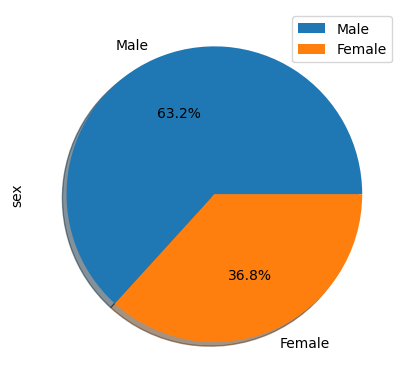

In [14]:
df_clear["sex"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%")
plt.legend()

## Histogram

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

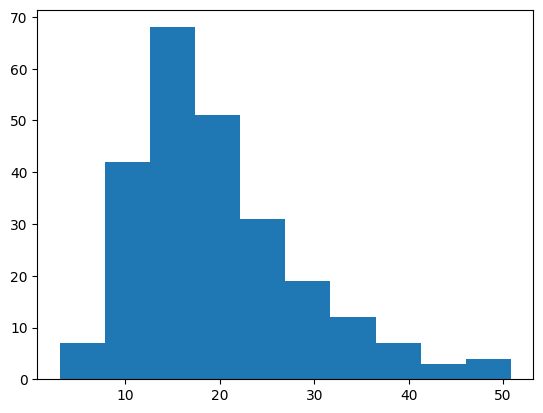

In [15]:
plt.hist(df['total_bill'])

Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

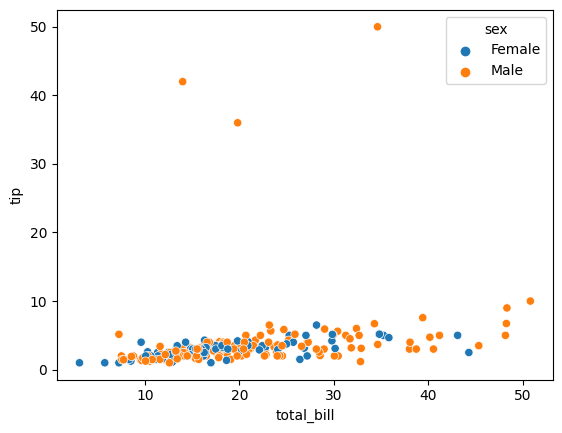

In [16]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "sex", data = df)

In [20]:
#Pivot cedvel formati

df_clear.groupby(['sex'])[['tip', 'total_bill']].agg('mean')

,tip,total_bill
sex,,
Female,2.789423,17.939302
Male,2.910546,19.892365
